<a href="https://colab.research.google.com/github/Hushpuppyzac/DLI-Assignment/blob/main/eric_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import requests
import nbformat
from IPython import get_ipython
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

def run_notebook_from_github(url):
    print("🔄 Downloading notebook from GitHub...")
    try:
        response = requests.get(url)
        response.raise_for_status()
    except Exception as e:
        print(f"❌ Failed to download notebook: {e}")
        return None

    print("📖 Parsing notebook content...")
    try:
        notebook = nbformat.reads(response.text, as_version=4)
    except Exception as e:
        print(f"❌ Failed to parse notebook: {e}")
        return None

    ipython = get_ipython()
    if ipython is None:
        print("❌ This function must be run in a Jupyter environment.")
        return None

    print("⚙️ Running notebook cells...\n")
    # Execute code from the downloaded notebook directly in the current scope
    for i, cell in enumerate(notebook.cells):
        if cell.cell_type == 'code':
            try:
                print(f"▶️ Executing cell [{i + 1}]...")
                # Use exec to execute the code in the current global scope
                exec(cell.source, globals())
            except Exception as e:
                print(f"❌ Error in cell [{i + 1}]: {e}")
                # Continue execution even if a cell fails, to see all errors

    print("\n✅ All executable cells have been processed.")
    # Return the variables needed for the next steps
    return X_train_scaled, X_test_scaled, y_train_balanced, y_test

notebook_url = "https://raw.githubusercontent.com/Hushpuppyzac/DLI-Assignment/main/CleanedData.ipynb"
# Assign the returned variables to the global scope
notebook_results = run_notebook_from_github(notebook_url)

if notebook_results is not None:
    X_train_scaled, X_test_scaled, y_train_balanced, y_test = notebook_results
    # Ensure the target variables are integers after running the notebook code
    if isinstance(y_train_balanced, pd.Series):
        y_train_balanced = y_train_balanced.astype(int)
    if isinstance(y_test, pd.Series):
        y_test = y_test.astype(int)

🔄 Downloading notebook from GitHub...
📖 Parsing notebook content...
⚙️ Running notebook cells...

▶️ Executing cell [2]...

             INITIAL DATASET INFORMATION             
Total rows before any cleaning: 225,745
Initial Label distribution (raw data):


,count
Label,
DDoS,128027
BENIGN,97718



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length M

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08




--- DataFrame Columns after stripping whitespace and renaming ---
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', '

,count
Label,
1,128014
0,95068



First 5 rows of cleaned DataFrame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0




             AFTER INITIAL TRAIN-TEST SPLIT             
Training data shape (X_train): (178465, 68)
Testing data shape (X_test):   (44617, 68)
Training label shape (y_train): (178465,)
Testing label shape (y_test):   (44617,)

Training label distribution:


,count
Label,
1,102411
0,76054



Testing label distribution:


,count
Label,
1,25603
0,19014




--- Class Distribution Before Balancing (Training Set) ---


,count
Label,
1,102411
0,76054



         AFTER UNDERSAMPLING (Training Set Only)         
Total rows in balanced training set: 152,108
Class balance (Training Set):


,count
Label,
0,76054
1,76054




        SAMPLE OF BALANCED TRAINING DATAFRAME        
Total Rows       : 152,108
DDoS Attacks     : 76,054
Benign Records   : 76,054

Balanced Training DataFrame (First 5 Rows):


,Destination Port,Flow Duration,Label
0,53,108497,0
1,61761,48116,0
2,59618,65,0
3,55903,9318481,0
4,80,9402695,1



DDoS Samples (Balanced Training Set - First 5):


,Destination Port,Flow Duration,Label
4,80,9402695,1
6,80,7373820,1
8,80,2857734,1
9,80,10943778,1
13,80,1784554,1



Benign Samples (Balanced Training Set - First 5):


,Destination Port,Flow Duration,Label
0,53,108497,0
1,61761,48116,0
2,59618,65,0
3,55903,9318481,0
5,80,5860218,0




        AFTER FEATURE EXTRACTION (TRAIN & TEST)        

Sample Extracted Features (Training Set - First 5):


,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
0,62,1.611,0.431,54248.229,0.931
1,11595,7.974,446.423,6873.704,0.143
2,0,0.000,0.000,32.500,0.000
3,0,1.000,0.200,1553077.578,1.167
4,0,1.000,3000000.000,1880535.239,1.200



Final Columns (Training Set after Feature Extraction):
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Down/Up R

,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
139654,0,1.000,0.200,819400.634,1.167
127815,5840,4.521,0.002,93517.633,0.249
111648,0,1.000,0.167,130544.814,1.143
76785,5840,4.521,0.002,7943.865,0.249
72328,0,1.000,3000000.000,61111.478,1.200



Final Columns (Testing Set after Feature Extraction):
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Down/Up Ra

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
0,-0.496462,-0.511479,-0.245222,-0.168530,-0.303820,-0.138477,-0.292419,0.082431,-0.269685,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.788134,-0.663447,-0.042185,-0.558311,0.632065
1,2.424285,-0.513378,0.004044,-0.123929,3.008621,-0.140547,5.431752,-0.182254,3.902286,5.708969,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,2.285842,1.203662,-0.042170,-0.578708,-0.982426
2,2.322853,-0.514890,-0.245222,-0.168530,-0.317288,-0.141196,-0.315716,-0.182254,-0.355898,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-1.136167,-0.042185,-0.581654,-1.275411
3,2.147016,-0.221781,-0.245222,0.009873,-0.315569,-0.140448,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.204030,-0.041240,-0.279191,-0.126852,0.081679,-0.804659,-0.842734,-0.042185,0.087018,1.115593
4,-0.495185,-0.219132,0.004044,-0.213131,-0.308692,-0.141196,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.217260,-0.036873,-0.279191,-0.123302,0.086489,-0.804659,-0.842734,0.058275,0.228007,1.183205



Sample of Scaled Testing Data (First 5 Rows):


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
139654,2.095897,-0.360247,-0.245222,0.009873,-0.315569,-0.140448,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-0.842734,-0.042185,-0.228870,1.115593
127815,-0.495185,-0.491359,-0.120589,0.009873,-0.309838,0.148192,-0.305803,-0.182254,-0.340001,-0.282545,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,0.751919,0.190441,-0.042185,-0.541403,-0.765248
111648,2.589378,-0.486148,-0.245222,0.054474,-0.315569,-0.140298,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-0.842734,-0.042185,-0.525461,1.066421
76785,-0.495185,-0.512893,-0.120589,0.009873,-0.309838,0.148192,-0.305803,-0.182254,-0.340001,-0.282545,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,0.751919,0.190441,-0.042185,-0.578247,-0.765248
72328,-0.495185,-0.505281,0.004044,-0.213131,-0.308692,-0.141196,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-0.842734,0.058275,-0.555356,1.183205




✅ All executable cells have been processed.


In [6]:
# This cell contains the code from ann.txt to define and train the ANN model.
# It uses the preprocessed data (X_train_scaled, y_train_balanced, X_test_scaled, y_test)
# that was generated by running the notebook from the GitHub URL.

# Code from ann.txt starts here:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define the ANN model
# The input dimension should match the number of features in your scaled training data (X_train_scaled)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
# Use the scaled and balanced training data
history = model.fit(X_train_scaled, y_train_balanced, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
# Use the scaled test data
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}") # Adjusted formatting to 4 decimal places

# Make predictions
y_pred_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype("int")

# Calculate and print individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\n--- Model Performance Summary ---")
print(f"🎯 Accuracy : {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🎯 Recall   : {recall:.4f}")
print(f"🎯 F1 Score : {f1:.4f}")
print(f"🎯 ROC AUC  : {roc_auc:.4f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4)) # Adjusted formatting to 4 decimal places

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Add an epoch column for easier readability
history_df['epoch'] = history_df.index + 1

# Display the DataFrame
print("\nTraining History Table:")
display(history_df[['epoch', 'accuracy', 'val_accuracy', 'loss', 'val_loss']])

# Code from ann.txt ends here.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9815 - loss: 0.0531 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 2/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9987 - loss: 0.0053 - val_accuracy: 0.9991 - val_loss: 0.0042
Epoch 3/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 4/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 5/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9991 - loss: 0.0043 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 6/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9991 - val_loss: 0.0091
Epoch 7/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0023
Epoch 8/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9994 - loss: 0

,epoch,accuracy,val_accuracy,loss,val_loss
0,1,0.995135,0.999244,0.019028,0.004358
1,2,0.998932,0.999145,0.005042,0.004221
2,3,0.998965,0.999310,0.004824,0.003462
3,4,0.999186,0.999408,0.004140,0.003353
4,5,0.999104,0.999375,0.004294,0.003006
5,6,0.999252,0.999145,0.003923,0.009145
6,7,0.999170,0.999310,0.003397,0.002348
7,8,0.999326,0.999277,0.003565,0.002753
8,9,0.999293,0.999375,0.003024,0.003410
9,10,0.999236,0.999310,0.003451,0.002724


In [7]:
import joblib
import os

# ✅ Step 1: Save the ANN model using TensorFlow's native method
model.save("ann_temp_model.keras")  # saves architecture + weights in TensorFlow format

# ✅ Step 2: Package model path + preprocessing objects into a dict
model_bundle = {
    "model_path": "ann_temp_model.keras",  # folder path containing TF model
    "scaler": scaler,                # if you used a StandardScaler/MinMaxScaler earlier
    "features": X_train_scaled.shape[1]
}

# ✅ Step 3: Save the bundle as a .pkl file to Google Drive
save_path = "/content/drive/MyDrive/Colab Notebooks/PhishingModell/ann_model.pkl"
joblib.dump(model_bundle, save_path)

print(f"✅ Model bundle saved to {save_path}")

✅ Model bundle saved to /content/drive/MyDrive/Colab Notebooks/PhishingModell/ann_model.pkl


In [8]:
# === SAVE ANN TO A SINGLE .PKL (self-contained) ===
import joblib
import numpy as np

# If you used a scaler (e.g., StandardScaler/MinMaxScaler), keep the fitted object here.
# Example:
# from sklearn.preprocessing import StandardScaler
# scaler = fitted_scaler
# If you didn't use any scaler, set:
# scaler = None

# Try to recover real feature names (best), else fall back to generic names
try:
    # If you still have the original X_train dataframe (before scaling):
    feature_names = list(X_train.columns)  # BEST option
except:
    # If not available, try to sniff from X_train_scaled if it's a DataFrame
    feature_names = getattr(X_train_scaled, "columns", None)
    if feature_names is None:
        # last resort: create generic names by length
        feature_names = [f"f{i}" for i in range(X_train_scaled.shape[1])]

def save_ann_to_pkl(model, scaler, feature_names, pkl_path):
    """
    Saves a Keras ANN as a single .pkl:
    - model architecture (JSON)
    - model weights (numpy arrays)
    - optional sklearn scaler
    - feature names for alignment
    - compile info (lr/loss/metrics)
    """
    bundle = {
        "type": "ann_bundle_v1",
        "model_json": model.to_json(),
        "weights": model.get_weights(),   # numpy arrays (pickle‑safe)
        "scaler": scaler,                 # None or a fitted transformer
        "features": list(feature_names) if feature_names is not None else None,
        "compile": {"lr": 1e-3, "loss": "binary_crossentropy", "metrics": ["accuracy"]},
    }
    joblib.dump(bundle, pkl_path)
    print(f"✅ Saved ANN bundle to {pkl_path}")

# === Choose your save path (example: Google Drive in Colab) ===
pkl_path = "/content/drive/MyDrive/Colab Notebooks/PhishingModell/ann_ddos.pkl"
save_ann_to_pkl(model, scaler, feature_names, pkl_path)


✅ Saved ANN bundle to /content/drive/MyDrive/Colab Notebooks/PhishingModell/ann_ddos.pkl


In [ ]:
!pip install -q gradio tensorflow joblib pandas numpy scikit-learn

import gradio as gr
import pandas as pd
import numpy as np
import joblib, traceback, io, os
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report
)

import tensorflow as tf
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import Adam


# =========================
# 1) Load ANN from .pkl
# =========================
PKL_PATH = "/content/drive/MyDrive/Colab Notebooks/PhishingModell/ann_ddos.pkl"  # <-- change if needed

def load_ann_from_pkl(pkl_path):
    bundle = joblib.load(pkl_path)
    if not (isinstance(bundle, dict) and bundle.get("type") == "ann_bundle_v1"):
        raise ValueError("Not an ANN bundle (.pkl with type='ann_bundle_v1').")

    model = model_from_json(bundle["model_json"])
    lr = bundle.get("compile", {}).get("lr", 1e-3)
    loss = bundle.get("compile", {}).get("loss", "binary_crossentropy")
    metrics = bundle.get("compile", {}).get("metrics", ["accuracy"])
    model.compile(optimizer=Adam(learning_rate=lr), loss=loss, metrics=metrics)
    model.set_weights(bundle["weights"])

    scaler = bundle.get("scaler", None)
    features = bundle.get("features", None)
    return model, scaler, features

model, scaler, feats = load_ann_from_pkl(PKL_PATH)


# =========================
# 2) Helpers
# =========================
def _read_csv_flex(file_obj_or_path):
    """Accepts Gradio file object or string path; tries tolerant read."""
    if hasattr(file_obj_or_path, "name"):
        path = file_obj_or_path.name
    elif isinstance(file_obj_or_path, str):
        path = file_obj_or_path
    else:
        raise ValueError("Unsupported CSV input.")

    try:
        return pd.read_csv(path, low_memory=False, on_bad_lines="skip", encoding_errors="replace")
    except Exception:
        return pd.read_csv(path, engine="python", on_bad_lines="skip", encoding_errors="replace")

def _prepare_numeric_matrix(df: pd.DataFrame, features, scaler):
    """
    Build exactly the feature matrix the scaler/model expect:
      - Prefer scaler.feature_names_in_ for canonical order
      - else use 'features' stored in .pkl
      - else use numeric columns present
      - add any missing columns as 0.0
      - strict column order
      - fill NaNs with 0.0
      - transform with scaler if provided
    Returns: (X_ndarray, X_used_df, missing_feature_list)
    """
    X = df.select_dtypes(include=[np.number]).copy()
    scaler_feats = list(getattr(scaler, "feature_names_in_", [])) if scaler is not None else []
    if len(scaler_feats) > 0:
        required = scaler_feats
    elif features is not None:
        required = list(features)
    else:
        required = list(X.columns)

    missing = [f for f in required if f not in X.columns]
    for m in missing:
        X[m] = 0.0

    X = X[required].fillna(0.0)
    X_nd = scaler.transform(X.values) if scaler is not None else X.values
    return X_nd, X, missing

def _predict_proba(model: tf.keras.Model, X_nd):
    return model.predict(X_nd, verbose=0).ravel()


# =========================
# 3) Core: predict + visualize
# =========================
def predict_and_visualize(csv_file, threshold):
    try:
        df = _read_csv_flex(csv_file)
        if df.empty:
            return ("CSV is empty.", None, None, None, None, None)

        # Find optional label column
        cand = [c for c in df.columns if c.lower() in ("label", "target", "class", "attack", "category")]
        label_col = cand[0] if cand else None

        if label_col:
            mapping = {"BENIGN":0,"Benign":0,"benign":0,"DDoS":1,"DDOS":1,"ddos":1}
            try:
                y_true = df[label_col].map(mapping).fillna(df[label_col]).astype(int).values
            except Exception:
                y_true = None
            X_df = df.drop(columns=[label_col])
        else:
            y_true = None
            X_df = df

        # Prepare features
        X_nd, X_used, missing = _prepare_numeric_matrix(X_df, feats, scaler)

        # Predict
        probs = _predict_proba(model, X_nd)
        preds = (probs >= float(threshold)).astype(int)

        # Compose summary text
        lines = []
        lines.append(f"Rows: {len(df)}  |  Numeric features used: {X_used.shape[1]}")
        lines.append(f"Threshold: {threshold:.2f}")
        if missing:
            lines.append(f"Filled {len(missing)} missing feature(s) with 0.0: {', '.join(missing[:10])}{' ...' if len(missing)>10 else ''}")

        # Build preview table
        preview = df.copy()
        preview["prob_ddos"] = probs
        preview["pred_label"] = preds
        preview_show = preview.head(30)

        # Save full results
        out_path = "/content/ann_ddos_predictions.csv"
        preview.to_csv(out_path, index=False)

        # Figures
        cm_fig = None
        roc_fig = None

        # If labels provided, compute metrics + plots
        if y_true is not None and len(y_true) == len(preds):
            acc = accuracy_score(y_true, preds)
            prec = precision_score(y_true, preds, zero_division=0)
            rec = recall_score(y_true, preds, zero_division=0)
            f1 = f1_score(y_true, preds, zero_division=0)
            lines.append(f"Accuracy: {acc:.3f} | Precision(DDoS): {prec:.3f} | Recall(DDoS): {rec:.3f} | F1: {f1:.3f}")

            # Confusion Matrix
            cm = confusion_matrix(y_true, preds, labels=[0,1])
            cm_fig, ax = plt.subplots()
            im = ax.imshow(cm, interpolation="nearest")
            ax.set_title("Confusion Matrix")
            ax.set_xticks([0,1]); ax.set_yticks([0,1])
            ax.set_xticklabels(["BENIGN","DDoS"]); ax.set_yticklabels(["BENIGN","DDoS"])
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, cm[i,j], ha="center", va="center")
            ax.set_xlabel("Predicted"); ax.set_ylabel("True")
            plt.tight_layout()

            # ROC
            try:
                fpr, tpr, _ = roc_curve(y_true, probs)
                auc = roc_auc_score(y_true, probs)
                roc_fig, ax2 = plt.subplots()
                ax2.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
                ax2.plot([0,1], [0,1], linestyle="--")
                ax2.set_xlabel("False Positive Rate")
                ax2.set_ylabel("True Positive Rate")
                ax2.set_title("ROC Curve")
                ax2.legend()
                plt.tight_layout()
            except Exception:
                pass
        else:
            lines.append("No labels found — showing predictions only (no CM/ROC).")

        # Probability per-row plot
        prob_fig, pax = plt.subplots()
        pax.plot(probs, label="P(DDoS)")
        pax.axhline(float(threshold), linestyle="--", label=f"Threshold={threshold:.2f}")
        pax.set_xlabel("Row index")
        pax.set_ylabel("Predicted Probability of DDoS")
        pax.set_title("Prediction Confidence per Sample")
        pax.legend()
        plt.tight_layout()

        summary = "\n".join(lines)
        return summary, preview_show, cm_fig, roc_fig, prob_fig, out_path

    except Exception as e:
        tb = traceback.format_exc()
        err = f"Error:\n{e}\n\nTraceback:\n{tb}"
        return (err, None, None, None, None, None)


# =========================
# 4) Gradio UI
# =========================
with gr.Blocks(title="ANN DDoS Detector") as demo:
    gr.Markdown("## 🛡️ ANN DDoS Detector — Predict & Visualize")
    with gr.Row():
        csv_in = gr.File(label="Upload CSV")
    with gr.Row():
        thr = gr.Slider(0.05, 0.95, value=0.50, step=0.01,
                        label="Decision threshold (DDoS if prob ≥ threshold)")
        run_btn = gr.Button("Run Prediction & Visualization", variant="primary")

    summary = gr.Textbox(label="Summary / Logs", lines=8)
    preview = gr.Dataframe(label="Preview (first 30 rows)", wrap=True)

    with gr.Row():
        cm_plot = gr.Plot(label="Confusion Matrix (requires labels)")
        roc_plot = gr.Plot(label="ROC Curve (requires labels)")

    prob_plot = gr.Plot(label="Probability per Row")
    dl = gr.File(label="Download full predictions (CSV)")

    run_btn.click(
        fn=predict_and_visualize,
        inputs=[csv_in, thr],
        outputs=[summary, preview, cm_plot, roc_plot, prob_plot, dl]
    )

demo.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://e7b043f8daec6b6040.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
pklwrapper = joblib.load("ann_model.pkl")
loaded_model = wrapper["model"]

# Predict
y_pred_prob = loaded_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int")


Visualize training history

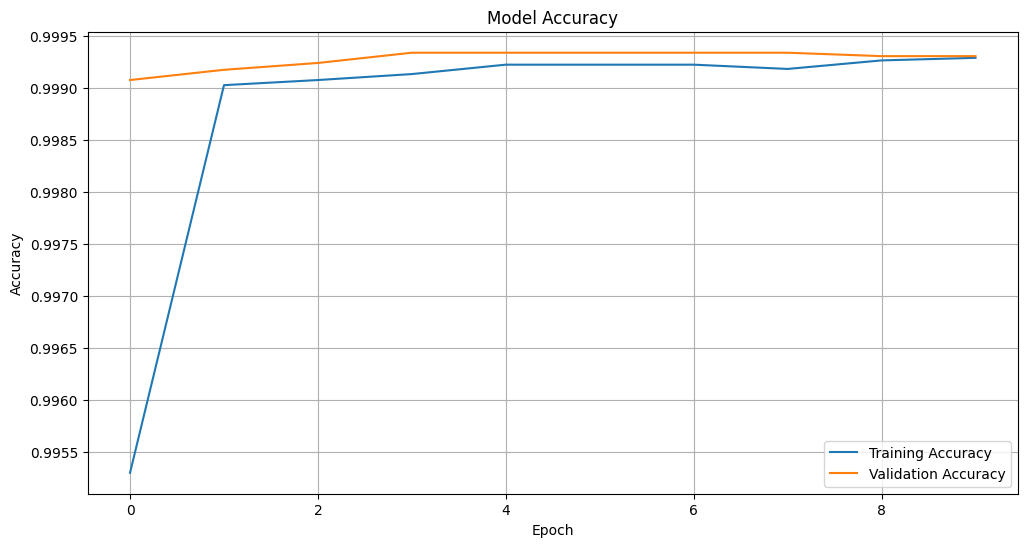

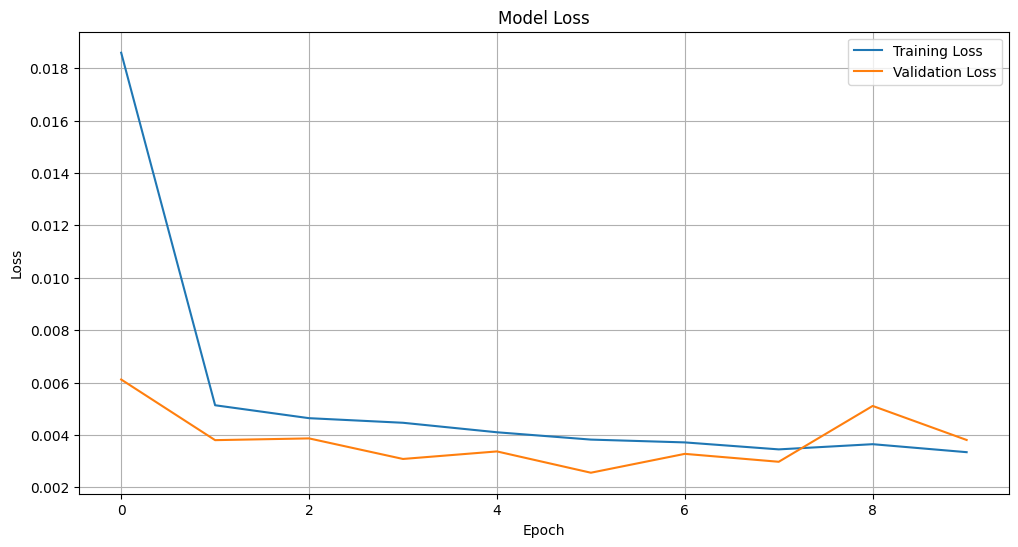

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

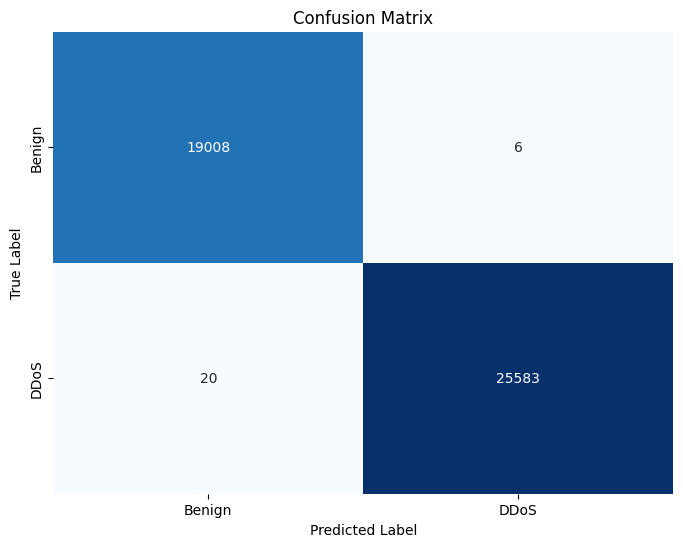

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'DDoS'], yticklabels=['Benign', 'DDoS'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

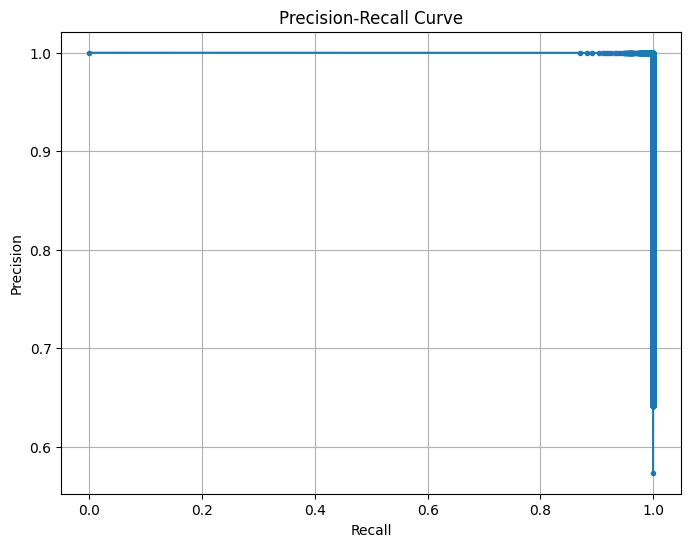

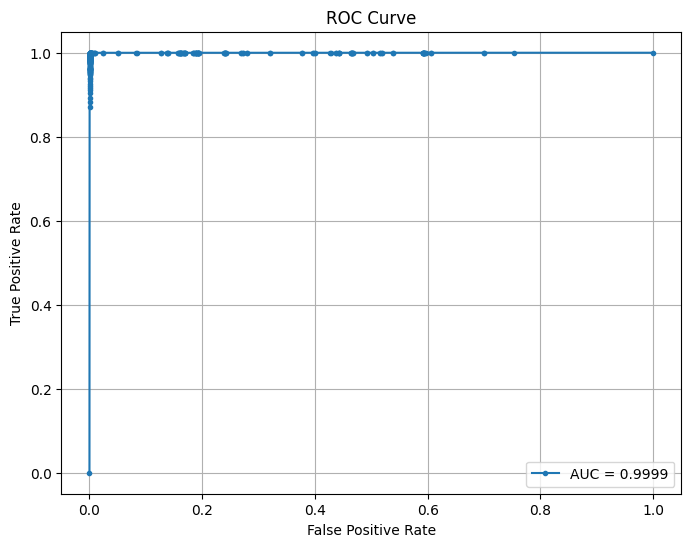

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate precision and recall for different thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'AUC = {roc_auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()